# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


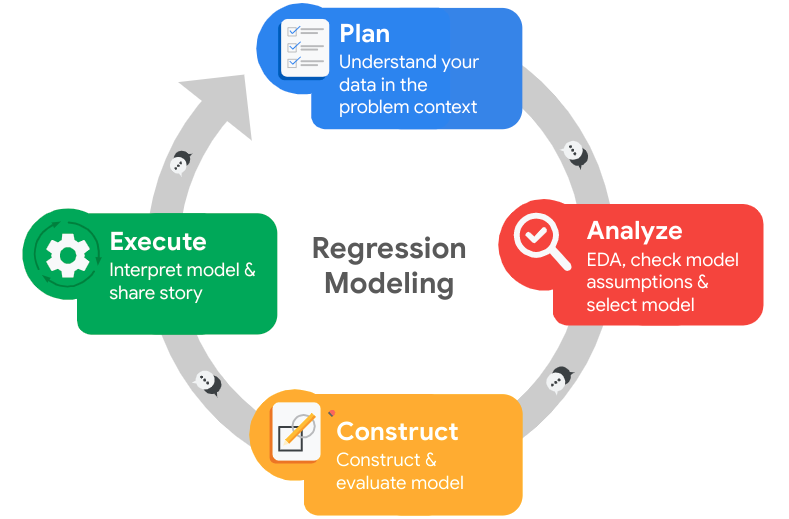

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression


#for metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

#saving models
import pickle

# for displaying all the columns
pd.set_option('display.max_columns', None)




### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident':'work_accident','average_montly_hours':'average_monthly_hours','time_spend_company':'tenure','Department':'department'
                         })

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()
 

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

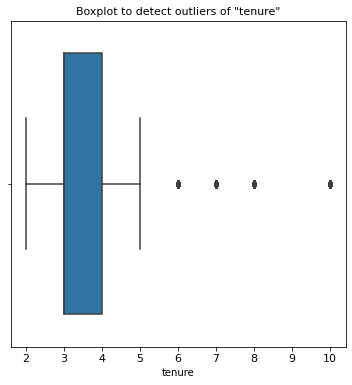

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers of "tenure"', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.boxplot(x=df1['tenure'])
plt.show()


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
#compute the 25th poercentitle value in 'tenure'
percentile25 =df1['tenure'].quantile(0.25)
#compute the 75th poercentitle value in 'tenure'
percentile75 =df1['tenure'].quantile(0.75)
#compute the interquartile range in 'tenure'
iqr = percentile75 - percentile25

# upperlimit and lower limit for 'tenure'
upper_limit = percentile75+ 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

#data containing outliers in 'tenure'
outliers = df1[(df1['tenure']>upper_limit)|(df1['tenure']<lower_limit)]

## of rows in the data containing outliers in 'tenure'
print("# of rows in the data containing outliers in 'tenure':",len(outliers))

Lower limit: 1.5
Upper limit: 5.5
# of rows in the data containing outliers in 'tenure': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

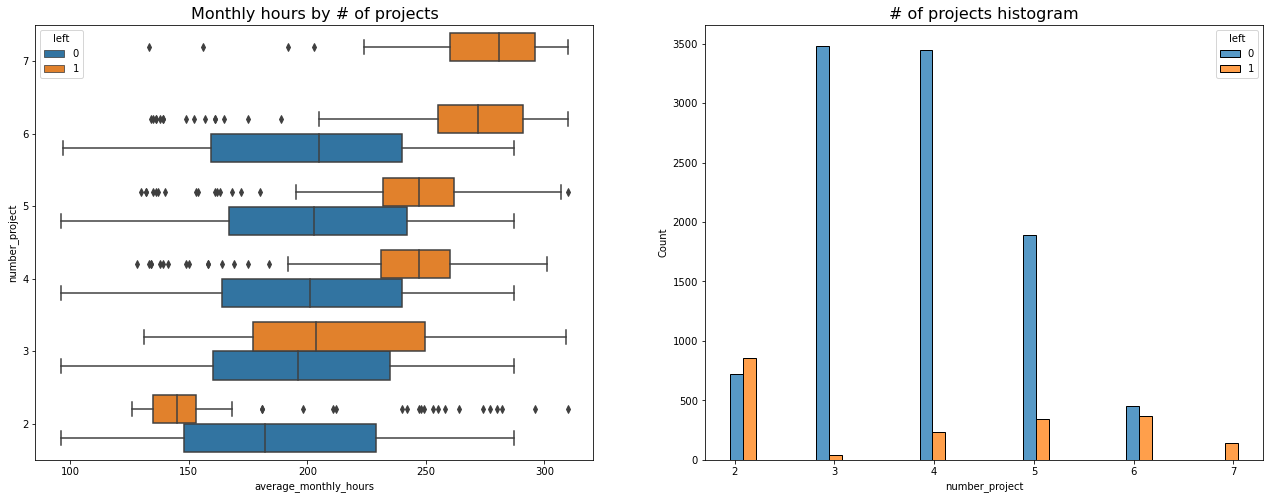

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
#set figure & axes
fig, ax = plt.subplots(1,2,figsize=(22,8))
#create boxplot showing  'average_monthly_hours' distributions for 'number_project', comparing employees who stayed vs.left
sns.boxplot(data=df1, x='average_monthly_hours',y='number_project',hue='left',orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by # of projects', fontsize='16')

#Create histogram showing distribution of 'number_project', comparing employees who stayed vs. left

sns.histplot(data=df1, x='number_project',hue='left', multiple='dodge',shrink=1.5,ax=ax[1])
ax[1].set_title('# of projects histogram',fontsize='16')

#display the plots
plt.show()



In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

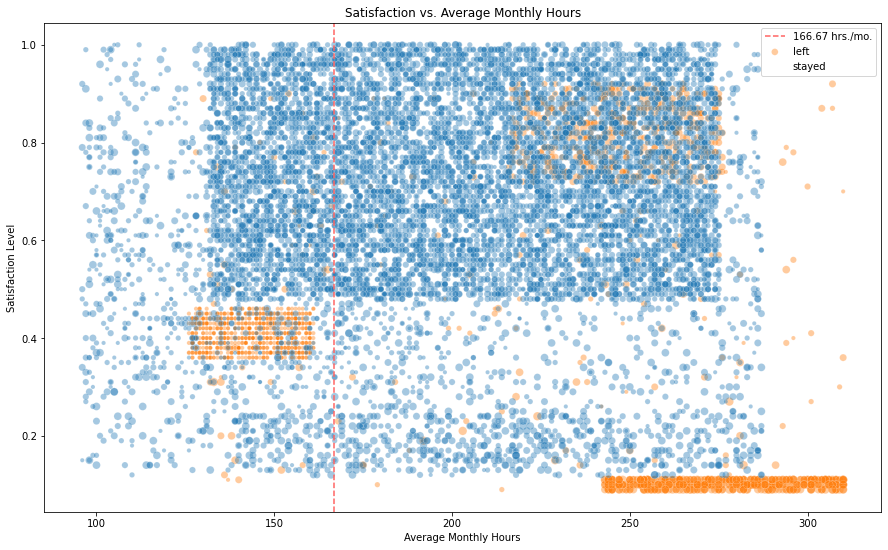

In [16]:
# Examine the average monthly hours versus the satisfaction levels
# scatterplot of 'average_monthly_hours' vs. 'satisfaction_level' comapring employees stayed vs. left
plt.figure(figsize=(15,9))
sns.scatterplot(data=df1,x='average_monthly_hours',y='satisfaction_level', hue='left',size='number_project',alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.',ls='--')
plt.legend(labels=['166.67 hrs./mo.','left','stayed'])
plt.title("Satisfaction vs. Average Monthly Hours")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Satisfaction Level");

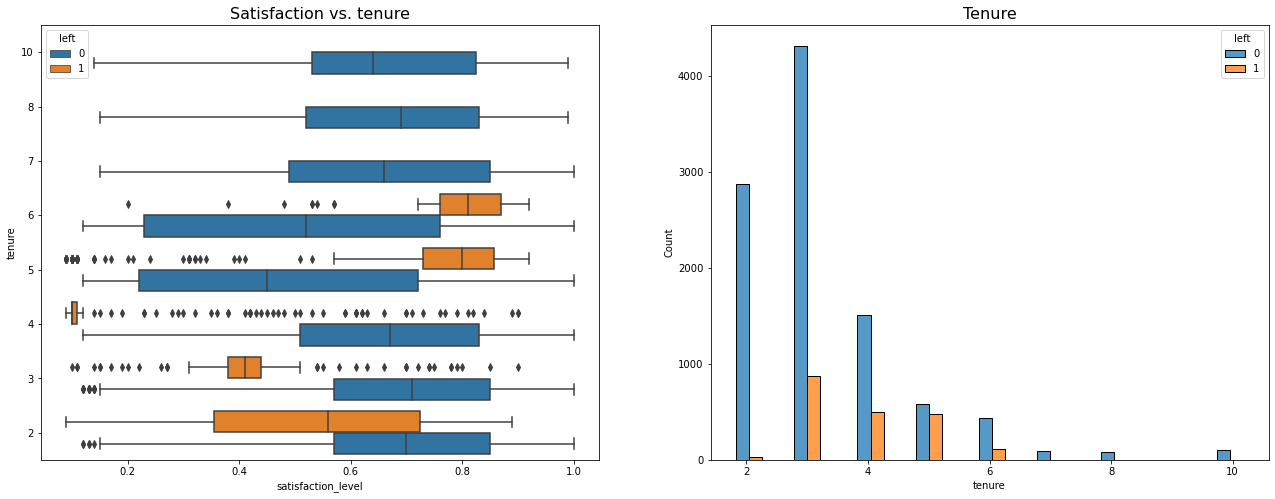

In [17]:
# satisfactionlevel by tenure
# set figure and axes
fig, ax =plt.subplots(1,2,figsize=(22,8))
#Boxplot showing 'satisfaction_level' by tenure, comparing employees stayed vs. left
sns.boxplot(data=df1, x='satisfaction_level',y='tenure',hue='left',orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction vs. tenure', fontsize='16')
# Histogram showing distribution of 'tenure', comparing employees stayed vs. left
sns.histplot(data=df1, x='tenure',hue='left',multiple='dodge',shrink=5, ax=ax[1])
ax[1].set_title('Tenure', fontsize='16')
plt.show()



In [18]:
# mean & median satisfacton scores of employees who left vs. stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Text(0.5, 1.0, 'Salary histogram by tenure: long-tenured people- greater than 6')

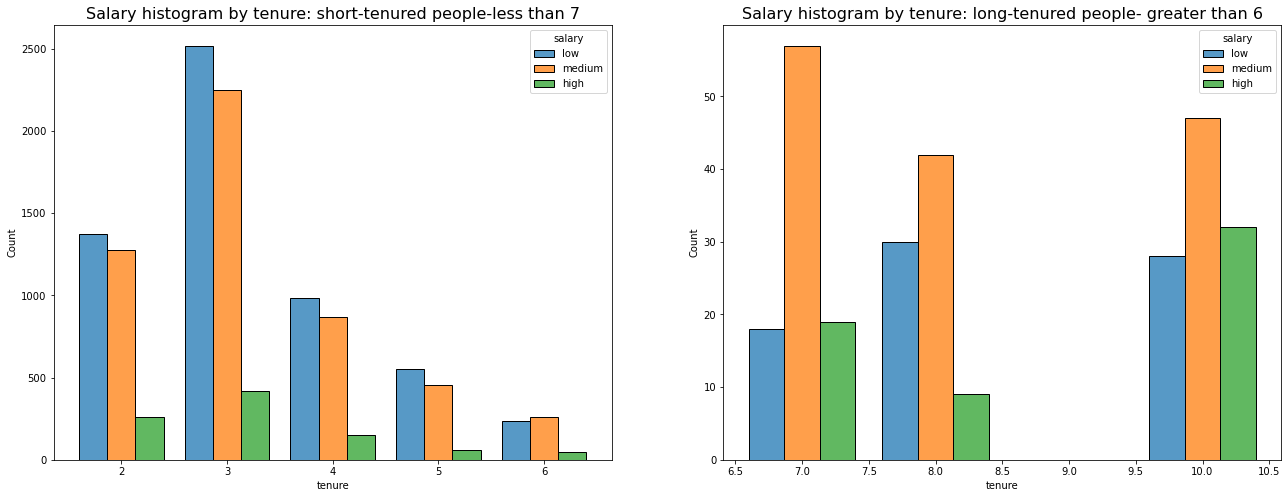

In [19]:
# satisfaction level for different tenures
#set figures and axes
fig, ax = plt.subplots(1,2,figsize=(22,8))
# Def short-tenured employees
tenure_short =df1[df1['tenure']<7]
 #def long-tenured employees
tenure_long = df1[df1['tenure']>6]
# Histogram for short-tenured
sns.histplot(data=tenure_short, x='tenure',hue='salary', discrete=1,
            hue_order=['low','medium','high'], multiple='dodge', shrink=0.8, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people-less than 7', fontsize='16')

#Histogram for long-tenured 
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,hue_order=['low','medium','high'],multiple='dodge', shrink=0.8, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people- greater than 6', fontsize=16)

Text(0.5, 1.0, 'Monthly hours vs. last evaluation')

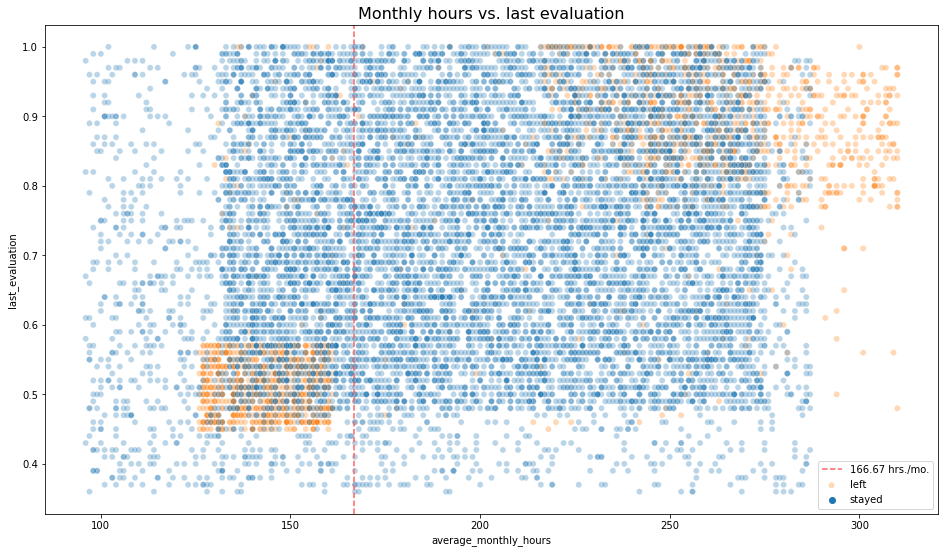

In [20]:
# working long hours vs. higher-paid employees
#scat terplot of 'average_monthly_hours' vs. 'last_evaluation'
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation',hue='left',alpha=0.3)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.','left','stayed'])
plt.title('Monthly hours vs. last evaluation', fontsize='16')

Text(0.5, 1.0, 'Monthly hours vs. promotion last 5 years')

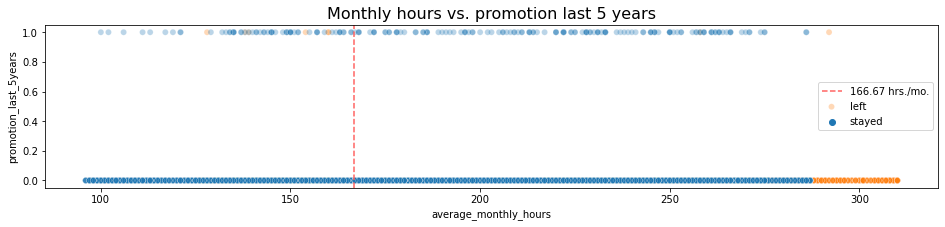

In [21]:
#working long hours vs promoted in the last 5 years
#examine the relationship b/t 'average_monthly _hours' vs. 'promotion_last_5years'
plt.figure(figsize=(16,3))
sns.scatterplot(data=df1, x='average_monthly_hours',y='promotion_last_5years', hue='left', alpha=0.3)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.','left','stayed'])
plt.title('Monthly hours vs. promotion last 5 years',fontsize='16')



In [22]:
#counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

Text(0, 0.5, 'Number of Employees')

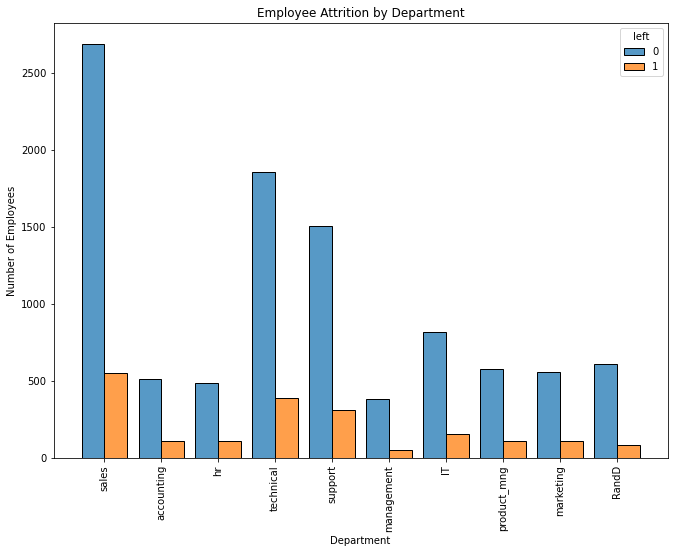

In [23]:
#Histogram to compare department distribution of employees who left vs. stayed
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, hue_order=[0,1], multiple='dodge', shrink=0.8)
plt.xticks(rotation='90')
plt.title('Employee Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')

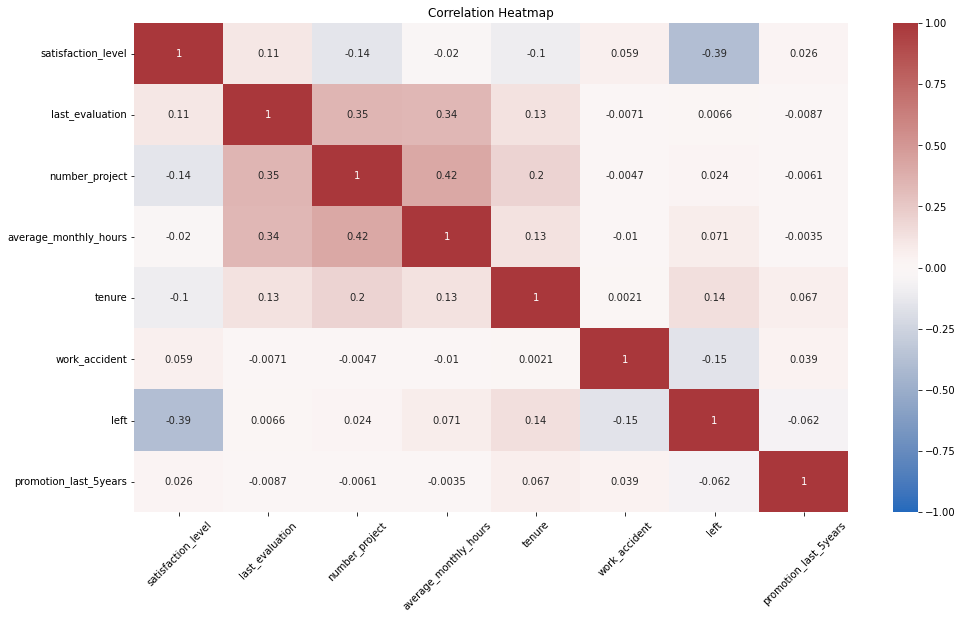

In [39]:
#Plot a correlation heatmap
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show();

### Insights

Employees leaving is due to long wokring hours, multiple projects and lower satisfaction levels.Another interesting fact is that if an employee has spent more than 6 years in the comopany, they tend not to leave, The management should be aware that there are a lot of employees probably burned out in the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Binary clacification (categorical outcome variable) since the outcome variable "left" can be either 1(employee left) or 0 (employee stayed)

### Identify the types of models most appropriate for this task.

Logistic Regression model or tree-based machine learning model

### Modeling

Add as many cells as you need to conduct the modeling process.

Binomial Logistic Regression

In [25]:
#creaste new dataframe
df_enc=df1.copy()
#convert 'salary' column to an ordinal numeric category
df_enc['salary']= (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low','medium','high'])
    .cat.codes
    )
#dummy the 'department' column

df_enc=pd.get_dummies(df_enc, drop_first=False)

#new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


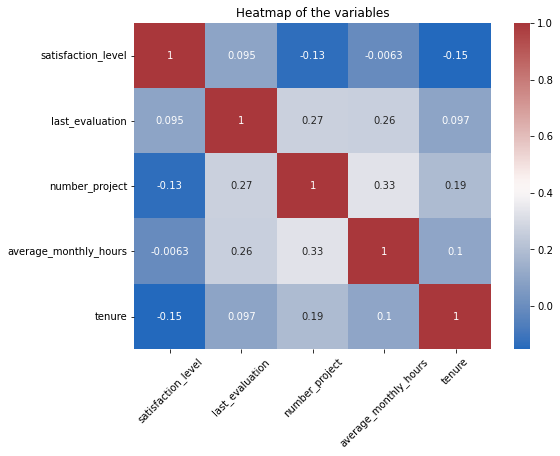

In [38]:
#Heatmap 'coolwarm', 'vlag', 'mako'
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure']]
            .corr(),annot=True, cmap="vlag")
plt.title('Heatmap of the variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

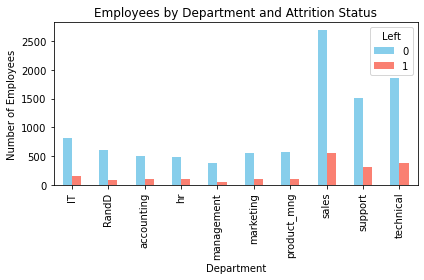

In [27]:
# of employees across department, comparing those who left vs. stayed
# 0 (skyblue color) represents employees who stayed, 1 (orange color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Employees by Department and Attrition Status')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Left')
plt.tight_layout()
plt.show()


In [28]:
#exclude outliers in 'tenure'
df_logreg = df_enc[(df_enc['tenure']>=lower_limit)& (df_enc['tenure']<=upper_limit)]
#Display first 10 rows of the daraframe
df_logreg.head(10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
10,0.45,0.54,2,135,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
#outcome variable
y= df_logreg['left']
#first 10 rows of the outcome variable
y.head(10)


0     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: left, dtype: int64

In [30]:
#Exclude outcome variable out of the model
X= df_logreg.drop('left', axis=1)
#Display the first 10 rows in teh model
X.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,0,0,0,0,0,0,0,0,0,1,0,0
10,0.45,0.54,2,135,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
#split the data into training vs. testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [32]:
#Construct a logistic regression model and fit it to the training data
log_clf= LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [33]:
#get the predictions on the test set
y_pred = log_clf.predict(X_test)

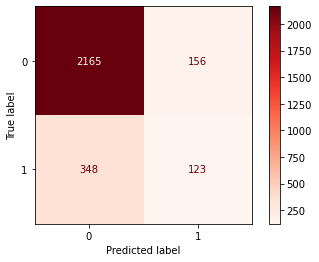

In [34]:
#Confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
#Display of COnfusion Metrix
log_disp= ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                display_labels=log_clf.classes_)
#plot confusion matrix
log_disp.plot(values_format='',cmap='Reds')
#show plot
#plt.show()



In [35]:
#Check class balance in the data
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [36]:
#Clasification report for logistic regression model
target_names = ['Stayed', 'left']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

      Stayed       0.86      0.93      0.90      2321
        left       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages) and accuracy of 82%.

### Conclusion, Recommendations, Next Steps
The model confirmed that employees are overworked.
- Cap the # of projects that employees can work on
- Consider promoting employees who have been with the company for over 4 years
- Reward employees for working long hours
- Make the overtime pay policy expectations about workload and time off clear
- Hold workshops to adress the company culture to the employees

Next step: 
We could use K-means model on the data.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.